平行坐标图：所有行（样本）的各个属性值的连线。一般有多少样本就有多少条线

## 载入数据

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签，字体名称为win中中文字体对应的英文名
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

%matplotlib inline

In [3]:
# 注意这种长字符串的写法，值得借鉴
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-"
"databases/undocumented/connectionist-bench/sonar/sonar.all-data")

In [4]:
try:
    # 第一个参数比较灵活，可以是url,也可是文件路径，或者IO等。
    df_sonar = pd.read_csv("../../data/sonar.csv", header=0)
except Exception as e:
    print(e)
    df_sonar = pd.read_csv(target_url, header=None, prefix='V')
    df_sonar.to_csv("../../data/sonar.csv", index=False)

df_sonar.head()

V0      V1      V2      V3      V4      V5      V6      V7      V8  \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       V9  ...     V51     V52     V53     V54     V55     V56     V57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

      V58     V59  V60  
0  0.0090  0.0032    R  
1  0.0052  0.0044    R  
2  0.0095  0.0078    R  
3  0.0040  0.0117    R  
4  0.0107  0.0094    R  

[5 rows x 61 columns]

In [5]:
df_sonar.tail()

V0      V1      V2      V3      V4      V5      V6      V7      V8  \
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         V9  ...     V51     V52     V53     V54     V55     V56     V57  \
203  0.2684  ...  0.0116  0.0098  0.0199  0.0033  0.0101  0.0065  0.0115   
204  0.2154  ...  0.0061  0.0093  0.0135  0.0063  0.0063  0.0034  0.0032   
205  0.2529  ...  0.0160  0.0029  0.0051  0.0062  0.0089  0.0140  0.0138   
206  0.2354  ...  0.0086  0.0046  0.0126  0.0036  0.0035  0.0034  0.0079   
207  0.2354  ...  0.0146  0.0129  0.0047  0.0039  0.0061  0.0040  0.0036   

        V58     V59  V60  
203  0.0193  0.0157    M  
204  0.0062  0.0067    M  
205  0.0077  0.0031    M  
206  0.0036  0.0048    M  
207  0.0061  0.0115    M  

[5 rows x 61 columns]

In [6]:
# df_rocks_vs_mines.to_csv("../../data/rocks_vs_mines.csv", index=False)

## 绘制平行坐标图（parallel coordinate）

我的理解，**应该将所有数据标准化后绘图，因为每个属性的量纲是不一样。**  
本例因为数据量纲是一致的，问题倒不大

In [7]:
df_sonar.shape

(208, 61)

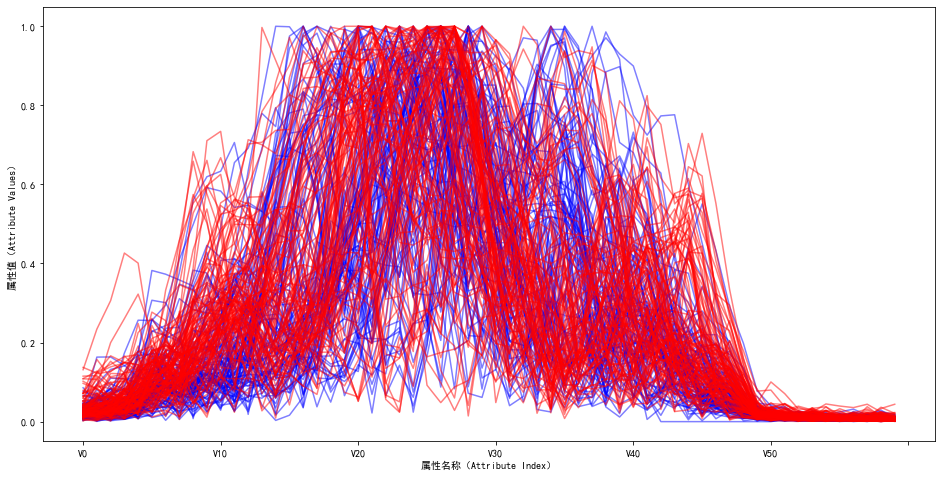

In [8]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)

nrows, ncols = df_sonar.shape
for i in range(nrows):
    # 最后一列是label数据
    if df_sonar.iat[i, -1] == 'M':
        pcolor = 'red'  # 类别是水雷，数据用红色表示
    else:
        pcolor = 'blue'  # 类别是岩石，数据用蓝色表示
    
    data_row = df_sonar.iloc[i, :-1]
    data_row.plot(alpha=0.5, color=pcolor, ax=ax)

ax.set_xlabel("属性名称（Attribute Index）")
ax.set_ylabel("属性值（Attribute Values）")
plt.show()